In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = load_iris()
X, y = data.data , data.target
labels = data.target_names

In [3]:
pipline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 2),),
    ('knn', KNeighborsClassifier(n_neighbors=5,))
])

In [4]:
print(pipline.fit(X, y))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('knn', KNeighborsClassifier())])


## SPlit data to train data and predict data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

## Fit the pipeline into the data set

In [7]:
pipline.fit(X_train, y_train)

# Measure the pipline  accuracy on the test data
test_sore = pipline.score(X_test, y_test)
print(f"{test_sore=:.3f}")

test_sore=0.900


## Get more prediction

In [8]:
y_pred = pipline.predict(X_test)

## Generate the confusion matrix for the KNN model and plot it

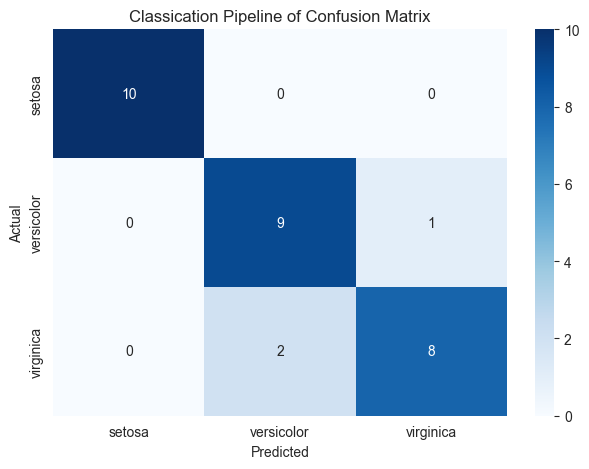

In [12]:
confor_maxtric = confusion_matrix(y_test, y_pred)
#creative single plot for the confusion matric
plt.figure()
sns.heatmap(confor_maxtric, annot=True, cmap="Blues",fmt='d',xticklabels=labels,yticklabels=labels)

# Set the title of the label
plt.title("Classication Pipeline of Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
#creative single plot for the confusion matric


## Describe the errors made  by the model

The model incorectly classified two viginica irises as versicolor, and one versicolor as virginica. Not bad, only three classification errors out of 30 irises on our first attempt! 

## Tune hyperparameters using a pipline  within cross-vadilation grid search

## Instantiate the pipline

In [22]:
# make the pipline without specifying  any parameter 
pipline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

## Define paragird for model

In [23]:
param_grid = {
    'pca__n_components': [2, 3],
    'knn__n_neighbors': [3,5, 7],
}

## Choose the cross validation method

In [24]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

## Determine the best parameter

In [25]:
best_model = GridSearchCV(
    estimator=pipline,
    param_grid=param_grid,
    cv= cv,
    scoring='accuracy',
    verbose=2,
    )

## Find the best gridsearchCV to the training data

In [26]:
best_model.fit(X_train, y_train)    

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

## Evaluate the accuracy of the best model on the test set

In [28]:
test_score = best_model.score(X_test, y_test)
print(test_score)

0.9333333333333333


In [29]:
## after using tune parameter in to the pipline of the model: the test_score increase from 0.9 to 0.93. That for the seen the new model apply Tune hyparameter in moder have effective than using the default

## Display the parameter

In [30]:
best_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [31]:
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

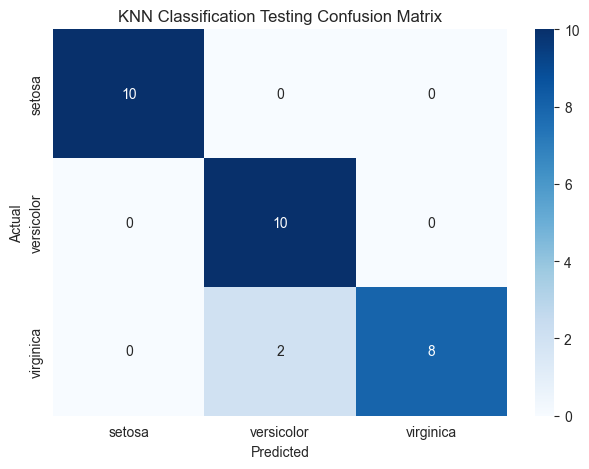

In [32]:
y_pred = best_model.predict(X_test)

# Generate the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()


After using the TUne parameter in to the model, from 3 Virginica & versicolor ( 1 to 0). now the mode have two error in vinginica & versidoclor. I think it bester. the resulf of the model also said that: the model don't over fit.